In [1]:
import pandas as pd


# Read the CSV file
df = pd.read_csv('ds_salaries.csv')

unique_job_titles= df['job_title'].unique()

average_salary_dict = dict()
for unique_job in unique_job_titles:
    people_with_this_job = df[df['job_title'] == unique_job]
    average_salary_dict[unique_job] = people_with_this_job['salary_in_usd'].median()


What if we want to plot these salaries? 

In [2]:
!pip install matplotlib

In [3]:
import matplotlib.pyplot as plt

In [4]:

average_salary_dict


df = pd.DataFrame()

for key, value in average_salary_dict.items():
    temp_df = pd.DataFrame({'Key': [key], 'Value': [value]})
    df = pd.concat([df, temp_df], ignore_index=True)

df.columns = ['job_title', 'mean_salary']

print(df)

salary_df = df

# Create a new dataframe
#salary_df = pd.DataFrame([average_salary_dict])
#print(salary_df)
# Assign column names
#salary_df.columns = ["mean_salary", "job_title"]
#print(salary_df.columns)
#print(salary_df)

                                   job_title  mean_salary
0                             Data Scientist     103691.0
1                 Machine Learning Scientist     156500.0
2                          Big Data Engineer      41305.5
3                       Product Data Analyst      13036.0
4                  Machine Learning Engineer      87932.0
5                               Data Analyst      90320.0
6                        Lead Data Scientist     115000.0
7                      Business Data Analyst      70912.0
8                         Lead Data Engineer     121593.5
9                          Lead Data Analyst      87000.0
10                             Data Engineer     105500.0
11                   Data Science Consultant      76833.0
12                           BI Data Analyst      76500.0
13                  Director of Data Science     168000.0
14                        Research Scientist      76263.5
15                  Machine Learning Manager     117104.0
16            

Can we make a histogram of the salary distribution? 

Play around with the number of bins. 

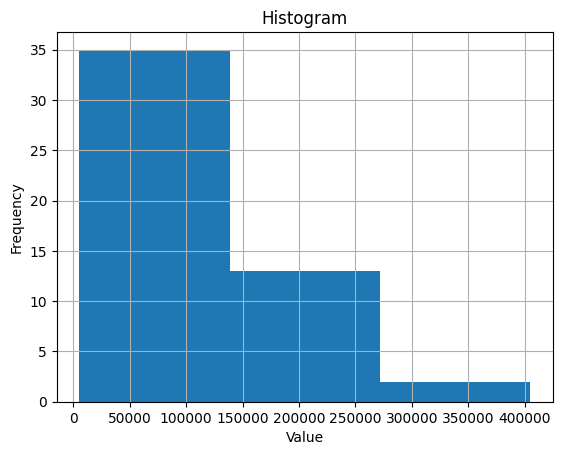

In [5]:
# Create histogram
salary_df.hist(column='mean_salary', bins=3)

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()


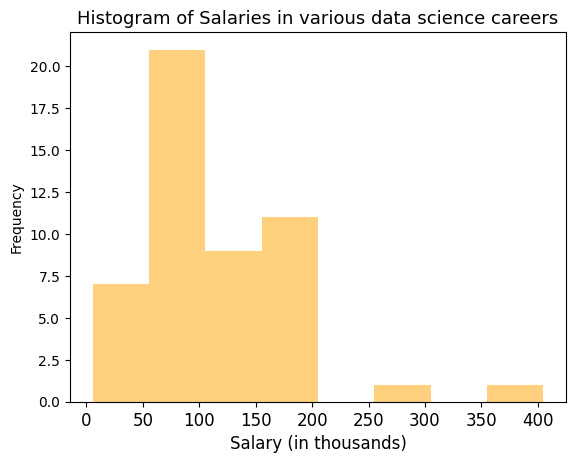

In [6]:
# Create histogram
salary_df['scaled_salary'] = salary_df['mean_salary'] / 1000
salary_df.hist(column='scaled_salary', bins=8, grid=False, alpha=0.5, color='orange')

# Set labels and title
plt.xlabel('Salary (in thousands)', fontsize=12)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of Salaries in various data science careers', fontsize=13)

plt.xticks(fontsize=12)


# Show the plot
plt.show()

Let's make a bar chart of the top 5 and bottom 5 salaries. 

In [7]:
df_sorted = salary_df.sort_values('mean_salary', ascending=False)

top_5 = df_sorted.head(5)
bottom_5 = df_sorted.tail(5)

print(df_sorted.columns)

Index(['job_title', 'mean_salary', 'scaled_salary'], dtype='object')


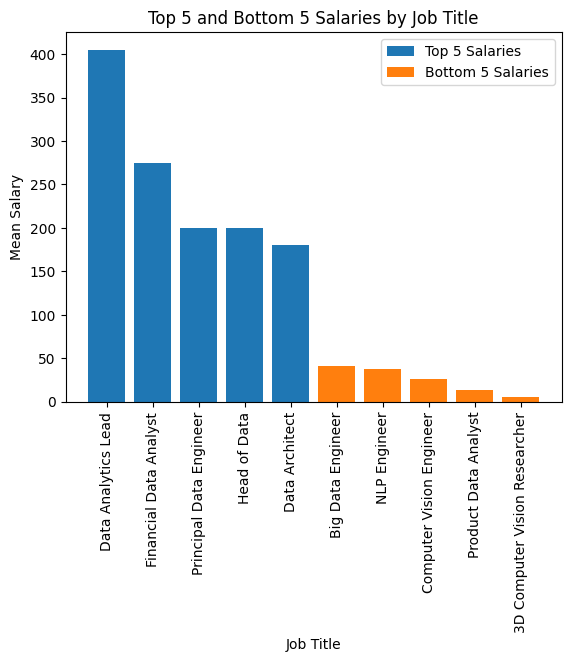

In [8]:
plt.bar(top_5['job_title'], top_5['scaled_salary'], label='Top 5 Salaries')
plt.bar(bottom_5['job_title'], bottom_5['scaled_salary'], label='Bottom 5 Salaries')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 5 and Bottom 5 Salaries by Job Title')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.show()


Finally, a scatter plot of mean vs variance 
Or somethign like this. 

In [9]:
import pprint
# Read the CSV file
df = pd.read_csv('ds_salaries.csv')


# Get the unique elements in the 'job_title' column
unique_job_titles= df['job_title'].unique()


std_dict = dict()
for unique_job in unique_job_titles:
    people_with_this_job = df[df['job_title'] == unique_job]
    std_dict[unique_job] = people_with_this_job['salary_in_usd'].std()
    #print(people_with_this_job['salary_in_usd'].describe())

#print("variance by job is:")
#pprint.pprint(std_dict)


average_salary_dict = dict()
for unique_job in unique_job_titles:
    people_with_this_job = df[df['job_title'] == unique_job]
    average_salary_dict[unique_job] = people_with_this_job['salary_in_usd'].median()

df = pd.DataFrame()



for key, value in average_salary_dict.items():
    temp_df = pd.DataFrame({'job_title': [key], 'mean_salary': [value], 'salary_std': std_dict[key]})
    df = pd.concat([df, temp_df], ignore_index=True)

df.columns = ['job_title', 'mean_salary', 'salary_std']

print(df)

salary_df = df




                                   job_title  mean_salary     salary_std
0                             Data Scientist     103691.0   64112.840519
1                 Machine Learning Scientist     156500.0   79514.714496
2                          Big Data Engineer      41305.5   42954.761263
3                       Product Data Analyst      13036.0    9848.583248
4                  Machine Learning Engineer      87932.0   63218.626439
5                               Data Analyst      90320.0   39961.075848
6                        Lead Data Scientist     115000.0   74715.181188
7                      Business Data Analyst      70912.0   43814.851149
8                         Lead Data Engineer     121593.5   74845.891227
9                          Lead Data Analyst      87000.0   75330.383160
10                             Data Engineer     105500.0   57629.082107
11                   Data Science Consultant      76833.0   30961.654417
12                           BI Data Analyst      7

In [10]:
salary_df['salary_std'].fillna(0.0, inplace=True)
print(salary_df)

                                   job_title  mean_salary     salary_std
0                             Data Scientist     103691.0   64112.840519
1                 Machine Learning Scientist     156500.0   79514.714496
2                          Big Data Engineer      41305.5   42954.761263
3                       Product Data Analyst      13036.0    9848.583248
4                  Machine Learning Engineer      87932.0   63218.626439
5                               Data Analyst      90320.0   39961.075848
6                        Lead Data Scientist     115000.0   74715.181188
7                      Business Data Analyst      70912.0   43814.851149
8                         Lead Data Engineer     121593.5   74845.891227
9                          Lead Data Analyst      87000.0   75330.383160
10                             Data Engineer     105500.0   57629.082107
11                   Data Science Consultant      76833.0   30961.654417
12                           BI Data Analyst      7

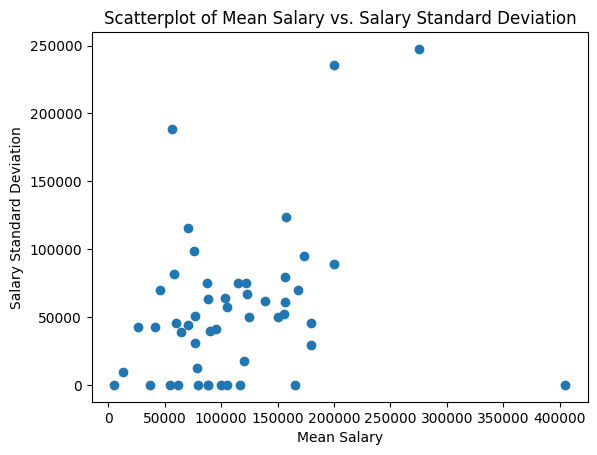

In [11]:
import matplotlib.pyplot as plt

df = salary_df 


# Assuming your pandas dataframe is called df
mean_salary = df['mean_salary']
salary_std = df['salary_std']
job_title = df['job_title']

# Scatterplot
plt.scatter(mean_salary, salary_std)

# Adding labels to the points
#for i, title in enumerate(job_title):
#    plt.annotate(title, (mean_salary[i], salary_std[i]), fontsize=6)

# Axis labels
plt.xlabel('Mean Salary')
plt.ylabel('Salary Standard Deviation')

# Title
plt.title('Scatterplot of Mean Salary vs. Salary Standard Deviation')

# Show the plot
plt.show()


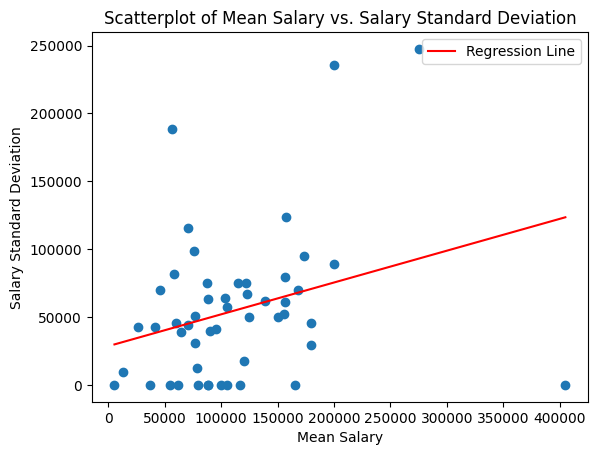

In [12]:
import numpy as np
# Assuming your pandas dataframe is called df
mean_salary = df['mean_salary']
salary_std = df['salary_std']
job_title = df['job_title']

# Scatterplot
plt.scatter(mean_salary, salary_std)

# Adding labels to the points
#for i, title in enumerate(job_title):
#    plt.annotate(title, (mean_salary[i], salary_std[i]))

# Linear regression line
slope, intercept = np.polyfit(mean_salary, salary_std, 1)
x_range = np.linspace(mean_salary.min(), mean_salary.max(), 100)
regression_line = slope * x_range + intercept
plt.plot(x_range, regression_line, color='r', label='Regression Line')

# Axis labels
plt.xlabel('Mean Salary')
plt.ylabel('Salary Standard Deviation')

# Title
plt.title('Scatterplot of Mean Salary vs. Salary Standard Deviation')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [13]:
import pandas as pd


# Read the CSV file
df = pd.read_csv('Eartquakes-1990-2023.csv')



In [14]:
print(df.head())
print(df.tail())

           time                                 place    status  tsunami  \
0  631153353990     12 km NNW of Meadow Lakes, Alaska  reviewed        0   
1  631153491210            14 km S of Volcano, Hawaii  reviewed        0   
2  631154083450            7 km W of Cobb, California  reviewed        0   
3  631155512130  11 km E of Mammoth Lakes, California  reviewed        0   
4  631155824490                16km N of Fillmore, CA  reviewed        0   

   significance   data_type  magnitudo        state   longitude   latitude  \
0            96  earthquake       2.50       Alaska -149.669200  61.730200   
1            31  earthquake       1.41       Hawaii -155.212333  19.317667   
2            19  earthquake       1.11   California -122.806167  38.821000   
3            15  earthquake       0.98   California -118.846333  37.664333   
4           134  earthquake       2.95   California -118.934000  34.546000   

    depth                              date  
0  30.100  1990-01-01 00:22:

In [15]:
print(df.columns)

Index(['time', 'place', 'status', 'tsunami', 'significance', 'data_type',
       'magnitudo', 'state', 'longitude', 'latitude', 'depth', 'date'],
      dtype='object')


In [16]:
#Loop over all data. 
#Get the counts by year 

df_earthquakes = df

all_years = list(range(1990, 2024))
year_dict = {year: 0 for year in all_years}

# Loop over the DataFrame rows
for index, row in df_earthquakes.iterrows():
    this_year = int(row['date'][0:4])
    year_dict[this_year] = year_dict[this_year] + 1

print(year_dict)



{1990: 52700, 1991: 50386, 1992: 92841, 1993: 70303, 1994: 70602, 1995: 69843, 1996: 62724, 1997: 71797, 1998: 69671, 1999: 69928, 2000: 72332, 2001: 73859, 2002: 95315, 2003: 100312, 2004: 114672, 2005: 102811, 2006: 101210, 2007: 96482, 2008: 126358, 2009: 90364, 2010: 104867, 2011: 107263, 2012: 106555, 2013: 114824, 2014: 136681, 2015: 125235, 2016: 123817, 2017: 132802, 2018: 130859, 2019: 143832, 2020: 175409, 2021: 160526, 2022: 145779, 2023: 82792}


In [17]:
if 2023 in year_dict:
    del(year_dict[2023])
import pprint 

pprint.pprint(year_dict)

{1990: 52700,
 1991: 50386,
 1992: 92841,
 1993: 70303,
 1994: 70602,
 1995: 69843,
 1996: 62724,
 1997: 71797,
 1998: 69671,
 1999: 69928,
 2000: 72332,
 2001: 73859,
 2002: 95315,
 2003: 100312,
 2004: 114672,
 2005: 102811,
 2006: 101210,
 2007: 96482,
 2008: 126358,
 2009: 90364,
 2010: 104867,
 2011: 107263,
 2012: 106555,
 2013: 114824,
 2014: 136681,
 2015: 125235,
 2016: 123817,
 2017: 132802,
 2018: 130859,
 2019: 143832,
 2020: 175409,
 2021: 160526,
 2022: 145779}


Plot the trend line for earthquakes per year. 

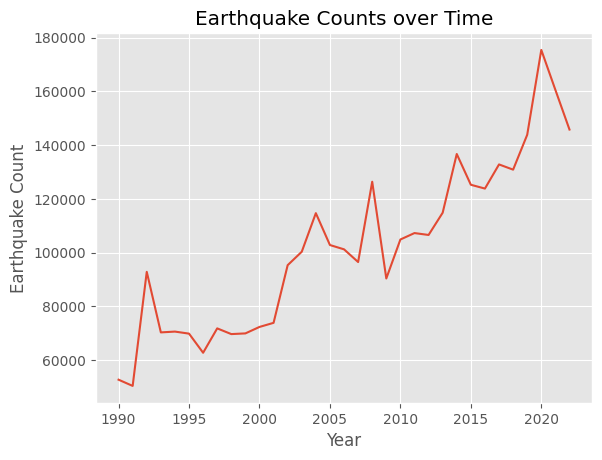

In [19]:
import matplotlib.pyplot as plt

# Set the ggplot style
plt.style.use('ggplot')

# Assuming year_dict is a dictionary with years as keys and earthquake counts as values
#year_dict = {2010: 100, 2011: 150, 2012: 120, ...}

# Extracting the years and earthquake counts as separate lists
years = list(year_dict.keys())
counts = list(year_dict.values())

# Plotting the earthquake counts over time
plt.plot(years, counts)
plt.xlabel('Year')
plt.ylabel('Earthquake Count')
plt.title('Earthquake Counts over Time')
plt.show()

Are the number of automatic earthquake detections increasing over time? Plot both trend lines. Make them look good. 

In [20]:
df_earthquakes = df



def get_earthquakes_per_year(df_input):
    all_years = list(range(1990, 2024)) 
    year_dict = {year: 0 for year in all_years}
    for index, row in df_input.iterrows():
        this_year = int(row['date'][0:4])
        year_dict[this_year] = year_dict[this_year] + 1
    return year_dict

auto_quakes = df_earthquakes[df_earthquakes['status'] == 'automatic']
reviewed_quakes = df_earthquakes[df_earthquakes['status'] == 'reviewed']

auto_quakes_count = get_earthquakes_per_year(df_input=auto_quakes)
reviewed_quakes_count = get_earthquakes_per_year(df_input=reviewed_quakes)
#earthquakes_automatic_detection

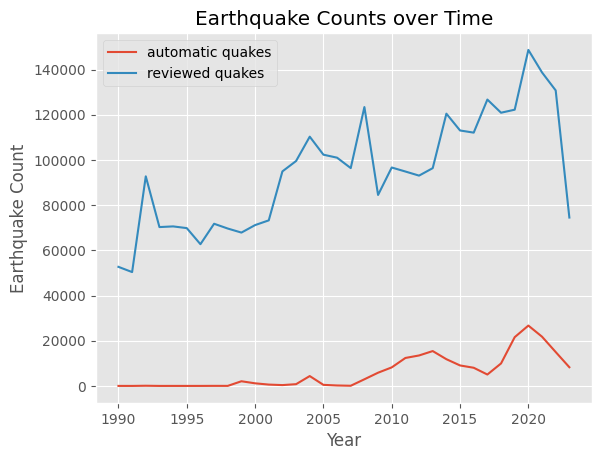

In [23]:
import matplotlib.pyplot as plt

# Set the ggplot style
plt.style.use('ggplot')

# Assuming year_dict is a dictionary with years as keys and earthquake counts as values
#year_dict = {2010: 100, 2011: 150, 2012: 120, ...}

# Extracting the years and earthquake counts as separate lists
years = list(auto_quakes_count.keys())
counts = list(auto_quakes_count.values())



# Plotting the earthquake counts over time
plt.plot(years, counts, label='automatic quakes')


years = list(reviewed_quakes_count.keys())
counts = list(reviewed_quakes_count.values())



# Plotting the earthquake counts over time
plt.plot(years, counts, label='reviewed quakes')

plt.xlabel('Year')
plt.ylabel('Earthquake Count')
plt.title('Earthquake Counts over Time')

# Add the legend
plt.legend()

plt.show()